In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')





#import model LDC data

gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')

nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')

canada_stat = pd.read_csv('../Resources/canada_stat.csv')

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')

cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters

canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')

nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')


#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_8 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_9 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_10 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

onset_seasons = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
observed_onset_seasons = {
    'AMJ': 0.256750,
    'MJJ': 0.281245,
    'JJA': 0.401165,
    'JAS': 0.576438,
    'ASO': 0.797956,
    'SON': 1.057599,
    'OND': 1.304206
}

In [3]:
gfdl_stat = gfdl_stat[['L', 'SZN', 'VAR_SST_GFDL_SPEAR']]
gfdl_stat

,L,SZN,VAR_SST_GFDL_SPEAR
0,1.5,JFM,0.600480
1,1.5,FMA,0.361776
2,1.5,MAM,0.229501
3,1.5,AMJ,0.129531
4,1.5,MJJ,0.185918
...,...,...,...
115,10.5,MJJ,0.380271
116,10.5,JJA,0.395347
117,10.5,JAS,0.476122
118,10.5,ASO,0.515503


In [4]:
#generate  
gfdl_ldv = gfdl_stat.pivot(index='L', columns='SZN', values='VAR_SST_GFDL_SPEAR')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
gfdl_ldv = gfdl_ldv[season_order]
gfdl_ldv 

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.129531,0.185918,0.341749,0.530060,0.674698,0.827131,0.990047
2.5,0.146751,0.164592,0.353194,0.519983,0.718559,0.909374,1.018578
3.5,0.153546,0.210448,0.321078,0.527701,0.686220,0.902582,1.134936
4.5,0.217253,0.226776,0.368722,0.453112,0.663950,0.889133,1.134390
5.5,0.272828,0.251563,0.376148,0.462081,0.546824,0.853508,1.142914
6.5,0.361468,0.293950,0.331142,0.475060,0.520426,0.714384,1.105441
7.5,0.364501,0.346343,0.362425,0.405131,0.550950,0.646750,0.943523
8.5,0.371956,0.373211,0.383679,0.418378,0.496197,0.695111,0.840752
9.5,0.414101,0.362095,0.419608,0.434631,0.481560,0.650376,0.909224


In [5]:
#add onset season climatology variance figures
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[gfdl_ldv.columns]

# Add the new row to the DataFrame
gfdl_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
gfdl_ldv = gfdl_ldv.reindex(index=['OBS', *gfdl_ldv.index.difference(['OBS'])])
gfdl_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.129531,0.185918,0.341749,0.530060,0.674698,0.827131,0.990047
2.5,0.146751,0.164592,0.353194,0.519983,0.718559,0.909374,1.018578
3.5,0.153546,0.210448,0.321078,0.527701,0.686220,0.902582,1.134936
4.5,0.217253,0.226776,0.368722,0.453112,0.663950,0.889133,1.134390
5.5,0.272828,0.251563,0.376148,0.462081,0.546824,0.853508,1.142914
6.5,0.361468,0.293950,0.331142,0.475060,0.520426,0.714384,1.105441
7.5,0.364501,0.346343,0.362425,0.405131,0.550950,0.646750,0.943523
8.5,0.371956,0.373211,0.383679,0.418378,0.496197,0.695111,0.840752


In [6]:
cola_stat = cola_stat[['L', 'SZN', 'VAR_SST_COLA_CESM1']]
cola_ldv = cola_stat.pivot(index='L', columns='SZN', values='VAR_SST_COLA_CESM1')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
cola_ldv = cola_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[cola_ldv.columns]

# Add the new row to the DataFrame
cola_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
cola_ldv = cola_ldv.reindex(index=['OBS', *cola_ldv.index.difference(['OBS'])])
cola_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.283165,0.506587,0.879959,1.050960,1.141980,1.218798,1.244078
2.5,0.429669,0.472060,1.103343,1.520026,1.601653,1.614026,1.603337
3.5,0.450764,0.647847,1.022889,1.762985,1.977304,2.013178,1.939147
4.5,0.567038,0.671936,1.178122,1.628399,2.189401,2.249102,2.330085
5.5,0.657170,0.710942,1.120836,1.727953,2.038832,2.458237,2.406558
6.5,0.753867,0.782359,1.063599,1.522806,2.143564,2.262017,2.637516
7.5,0.787690,0.826150,1.072883,1.435172,1.769103,2.426560,2.378447
8.5,0.833041,0.881735,1.061933,1.363929,1.701400,1.924866,2.607697


In [7]:
canada_stat = canada_stat[['L', 'SZN', 'VAR_SST_CanSIPS_IC4']]
canada_ldv = canada_stat.pivot(index='L', columns='SZN', values='VAR_SST_CanSIPS_IC4')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
canada_ldv = canada_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[canada_ldv.columns]

# Add the new row to the DataFrame
canada_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
canada_ldv = canada_ldv.reindex(index=['OBS', *canada_ldv.index.difference(['OBS'])])
canada_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.343562,0.411945,0.569909,0.716595,0.894219,1.187629,1.525122
2.5,0.461086,0.413618,0.563536,0.701362,0.867661,1.086692,1.379021
3.5,0.485872,0.474798,0.488519,0.629602,0.745085,0.965398,1.197635
4.5,0.500726,0.434346,0.495418,0.510621,0.650100,0.807621,1.081958
5.5,0.604788,0.409301,0.431113,0.494001,0.516285,0.705814,0.892571
6.5,0.581386,0.491759,0.374589,0.424223,0.498837,0.557966,0.783133
7.5,0.524629,0.490707,0.430071,0.356636,0.428072,0.546676,0.620338
8.5,0.476699,0.443854,0.439185,0.392657,0.355567,0.473074,0.613020


In [8]:
canesm_stat = canesm_stat[['L', 'SZN', 'VAR_SST_CanESM5']]
canesm_ldv = canesm_stat.pivot(index='L', columns='SZN', values='VAR_SST_CanESM5')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
canesm_ldv = canesm_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[canesm_ldv.columns]

# Add the new row to the DataFrame
canesm_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
canesm_ldv = canesm_ldv.reindex(index=['OBS', *canesm_ldv.index.difference(['OBS'])])
canesm_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.239228,0.212050,0.267144,0.356811,0.488385,0.775685,1.082255
2.5,0.239068,0.213886,0.239226,0.277551,0.435770,0.635099,0.930923
3.5,0.262874,0.212259,0.200543,0.256909,0.314833,0.568125,0.800532
4.5,0.310245,0.225837,0.194397,0.195308,0.294892,0.402766,0.726456
5.5,0.459267,0.259281,0.204663,0.188304,0.217062,0.377708,0.520538
6.5,0.475766,0.375313,0.219815,0.192717,0.212190,0.284185,0.493367
7.5,0.401913,0.390769,0.292699,0.207257,0.213953,0.285203,0.382156
8.5,0.391348,0.330611,0.301954,0.245628,0.234434,0.283805,0.393478


In [9]:
nemo_stat = nemo_stat[['L', 'SZN', 'VAR_SST_GEM52_NEMO']]
nemo_ldv = nemo_stat.pivot(index='L', columns='SZN', values='VAR_SST_GEM52_NEMO')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
nemo_ldv = nemo_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[nemo_ldv.columns]

# Add the new row to the DataFrame
nemo_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
nemo_ldv = nemo_ldv.reindex(index=['OBS', *nemo_ldv.index.difference(['OBS'])])
nemo_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.447896,0.611840,0.872674,1.076379,1.300054,1.599573,1.967989
2.5,0.683105,0.613350,0.887846,1.125173,1.299552,1.538285,1.827119
3.5,0.708869,0.737336,0.776495,1.002295,1.175337,1.362671,1.594737
4.5,0.691207,0.642856,0.796439,0.825934,1.005309,1.212477,1.437459
5.5,0.750310,0.559322,0.657563,0.799697,0.815507,1.033919,1.264604
6.5,0.687006,0.608206,0.529363,0.655728,0.785485,0.831746,1.072898
7.5,0.647346,0.590644,0.567442,0.506015,0.642192,0.808150,0.858519
8.5,0.562051,0.557097,0.576416,0.539687,0.476701,0.662343,0.832562


In [10]:
nasa_stat = nasa_stat[['L', 'SZN', 'VAR_SST_NASA_GEOSS2S']]
nasa_ldv = nasa_stat.pivot(index='L', columns='SZN', values='VAR_SST_NASA_GEOSS2S')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
nasa_ldv = nasa_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[nasa_ldv.columns]

# Add the new row to the DataFrame
nasa_ldv.loc['OBS'] = new_row_df.loc['OBS']

#Test
nasa_ldv = nasa_ldv.reindex(index=['OBS', *nasa_ldv.index.difference(['OBS'])])
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_ldv.columns)
nasa_ldv = pd.concat([nasa_ldv, new_rows])
nasa_ldv.index.name = 'L'

nasa_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.512972,0.488650,0.669966,1.103760,1.431523,1.754644,2.257283
2.5,0.719516,0.682087,0.782244,1.117485,1.652974,1.942273,2.214549
3.5,0.780790,0.777451,1.016211,1.194557,1.629177,2.128712,2.357184
4.5,1.022385,0.685404,1.019241,1.438445,1.672325,2.156099,2.608374
5.5,1.285227,0.881837,0.766712,1.430314,1.948759,2.191598,2.690799
6.5,1.371004,1.041538,0.895335,1.008862,1.884670,2.516201,2.688800
7.5,1.497271,1.050840,0.961526,0.988125,1.284540,2.376893,3.129914
8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ncep_stat = ncep_stat[['L', 'SZN', 'VAR_SST_NCEP_CFSv2']]
ncep_ldv = ncep_stat.pivot(index='L', columns='SZN', values='VAR_SST_NCEP_CFSv2')
#season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
season_order = ['AMJ','MJJ','JJA','JAS','ASO','SON','OND']
ncep_ldv = ncep_ldv[season_order]
observed_onset_seasons_series = pd.Series(observed_onset_seasons, name='OBS')
new_row_df = pd.DataFrame([observed_onset_seasons_series])

# Ensure columns are in the same order
new_row_df = new_row_df[ncep_ldv.columns]

# Add the new row to the DataFrame
ncep_ldv.loc['OBS'] = new_row_df.loc['OBS']

# Reorder the DataFrame to place 'OBS' at the top
ncep_ldv = ncep_ldv.reindex(index=['OBS', *ncep_ldv.index.difference(['OBS'])])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_ldv.columns)
ncep_ldv = pd.concat([ncep_ldv, new_rows])
ncep_ldv.index.name = 'L'

ncep_ldv

SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
OBS,0.256750,0.281245,0.401165,0.576438,0.797956,1.057599,1.304206
1.5,0.330704,0.372411,0.619614,0.950240,1.158378,1.330474,1.370115
2.5,0.414759,0.448884,0.633693,0.965637,1.434475,1.626268,1.764138
3.5,0.382987,0.510351,0.660449,0.927013,1.301672,1.844581,1.915708
4.5,0.411878,0.438730,0.739515,0.916497,1.244632,1.663943,2.125285
5.5,0.475851,0.421352,0.624615,1.022076,1.205893,1.599353,1.930847
6.5,0.511656,0.427918,0.569797,0.873992,1.323680,1.524159,1.869422
7.5,0.441344,0.463908,0.529188,0.788467,1.143294,1.630958,1.760825
8.5,0.441521,0.463146,0.645779,0.750419,1.062295,1.370846,1.806787


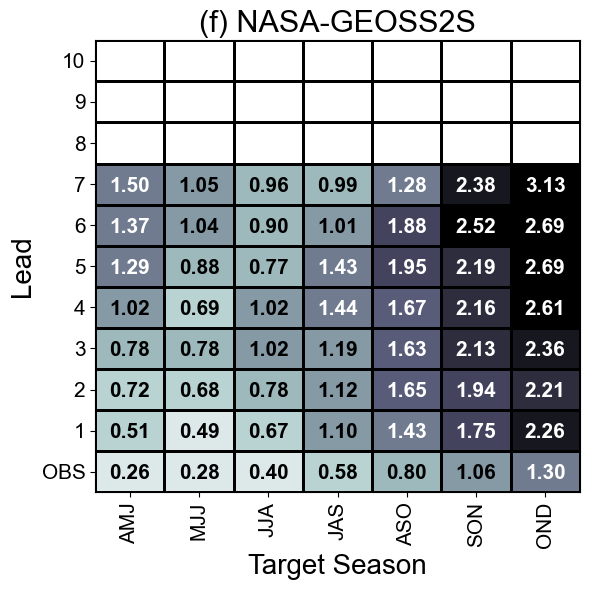

In [12]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(nasa_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(nasa_ldv.index))    # Numerical indices for Target times (TAR)
Z = nasa_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(f) NASA-GEOSS2S', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=nasa_ldv.index , size = 15)
y_labels = nasa_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/nasa_ldv.svg', format='svg')
plt.show()

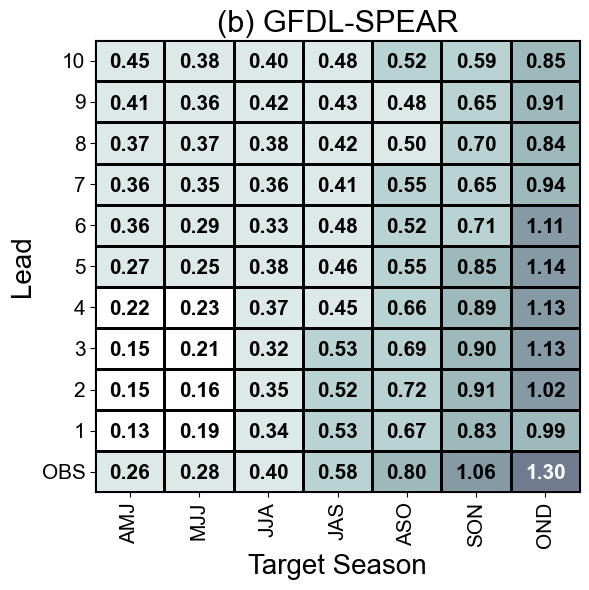

In [13]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(gfdl_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(gfdl_ldv.index))    # Numerical indices for Target times (TAR)
Z = gfdl_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(b) GFDL-SPEAR', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=gfdl_ldv.index , size = 15)
y_labels = gfdl_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/gfdl_ldv.svg', format='svg')
plt.show()

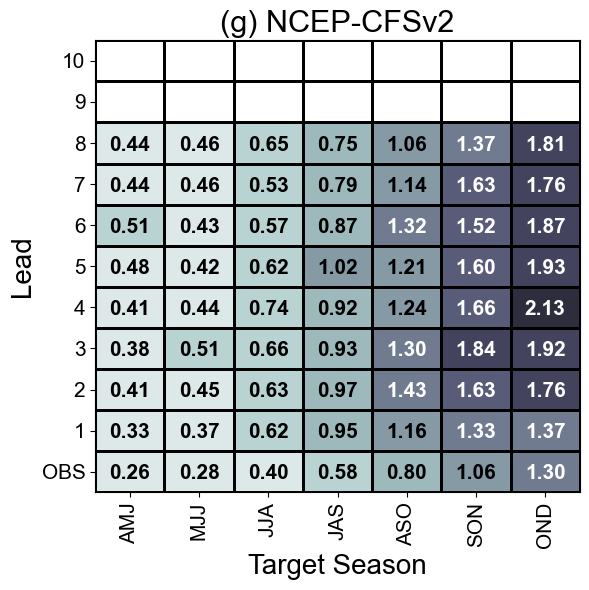

In [14]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(ncep_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(ncep_ldv.index))    # Numerical indices for Target times (TAR)
Z = ncep_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(g) NCEP-CFSv2', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=ncep_ldv.index , size = 15)
y_labels = ncep_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/ncep_ldv.svg', format='svg')
plt.show()

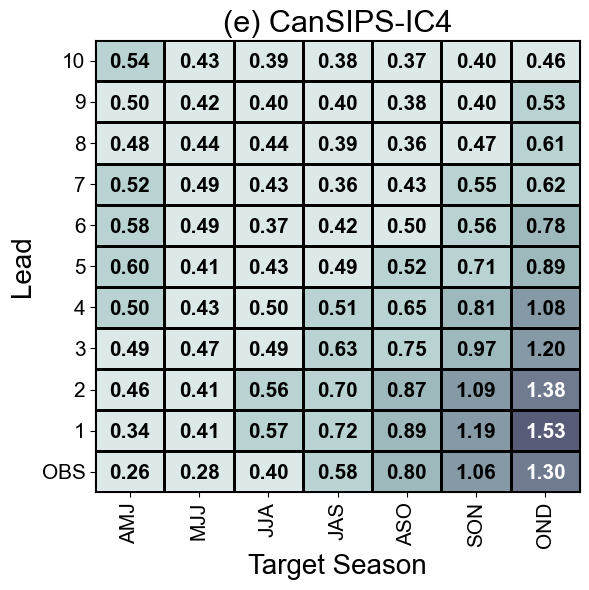

In [15]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(canada_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(canada_ldv.index))    # Numerical indices for Target times (TAR)
Z = canada_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(e) CanSIPS-IC4', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=canada_ldv.index , size = 15)
y_labels = canada_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/canada_ldv.svg', format='svg')
plt.show()

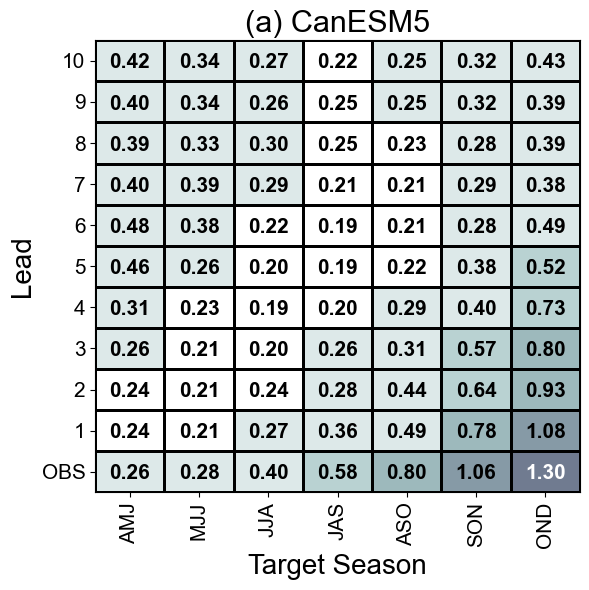

In [16]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(canesm_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(canesm_ldv.index))    # Numerical indices for Target times (TAR)
Z = canesm_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(a) CanESM5', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=canesm_ldv.index , size = 15)
y_labels = canesm_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/canesm_ldv.svg', format='svg')
plt.show()

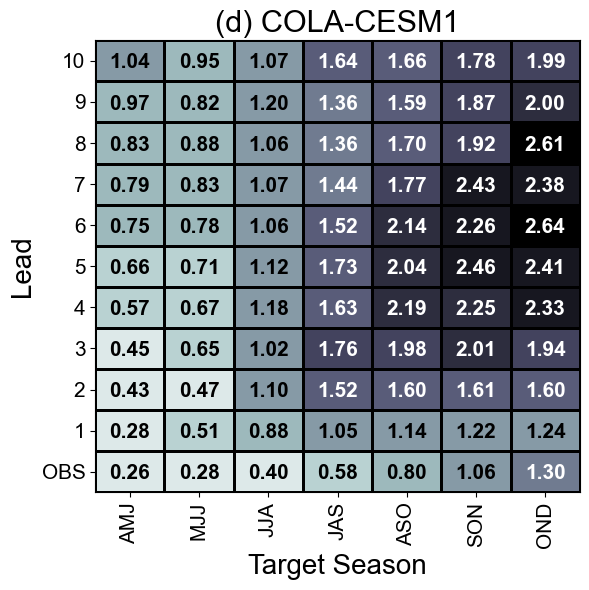

In [17]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(cola_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(cola_ldv.index))    # Numerical indices for Target times (TAR)
Z = cola_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(d) COLA-CESM1', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=cola_ldv.index , size = 15)
y_labels = cola_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/cola_ldv.svg', format='svg')
plt.show()

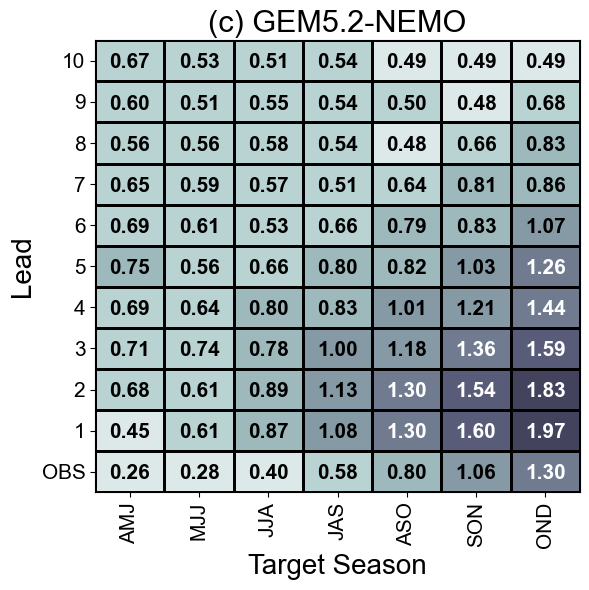

In [18]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(nemo_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(nemo_ldv.index))    # Numerical indices for Target times (TAR)
Z = nemo_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(6,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
 #plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(c) GEM5.2-NEMO', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=nemo_ldv.index , size = 15)
y_labels = nemo_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/nemo_ldv.svg', format='svg')
plt.show()

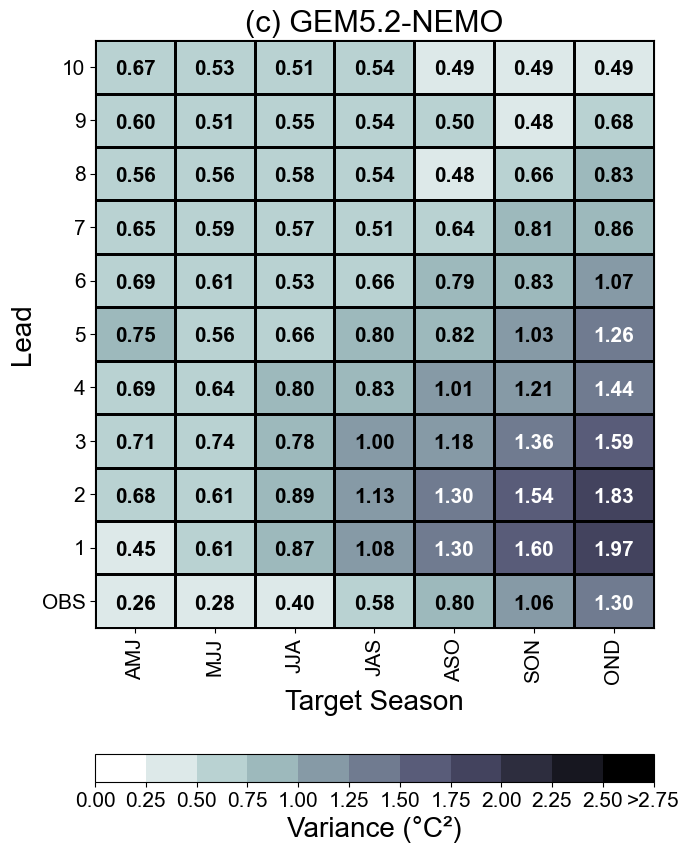

In [29]:

from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(nemo_ldv.columns))  # Numerical indices for Leads (L)
y = np.arange(len(nemo_ldv.index))    # Numerical indices for Target times (TAR)
Z = nemo_ldv.values

boundaries = np.arange(0, 3.0, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.figure(figsize=(5, 7))
plt.figure(figsize=(7,9))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bone_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
cbar = plt.colorbar(c, label='Variance',boundaries=boundaries, ticks=boundaries, orientation = 'horizontal')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Variance (°C²)', fontsize=20)
tick_labels = [f'{b:.2f}' for b in boundaries[:-1]] + ['>2.75']
cbar.ax.set_xticklabels(tick_labels)

# Add labels and title
plt.xlabel('Target Season', size = 20)
plt.ylabel('Lead', size = 20)
plt.title('(c) GEM5.2-NEMO', size = 22)

# Adjust y-ticks to show original string labels
plt.yticks(ticks=y, labels=nemo_ldv.index , size = 15)
y_labels = nemo_ldv.index.tolist()
adjusted_y_labels = [str(int(float(label)-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_ldv.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bone_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/LDV/colorbar.svg', format='svg')
plt.show()

In [ ]:
gfdl_ldv.to_csv('../Resources/gfdl_ldv.csv')
nasa_ldv.to_csv('../Resources/nasa_ldv.csv')
cola_ldv.to_csv('../Resources/cola_ldv.csv')
ncep_ldv.to_csv('../Resources/ncep_ldv.csv')
canada_ldv.to_csv('../Resources/canada_ldv.csv')
nemo_ldv.to_csv('../Resources/nemo_ldv.csv')
canesm_ldv.to_csv('../Resources/canesm_ldv.csv')

In [ ]:
ncep_ldv

In [ ]:
gfdl_ldv